In [121]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
import os
import sys

sys.path.insert(0, os.path.abspath("../../.."))

In [123]:
from dotenv import load_dotenv
import pandas as pd
import numpy as np

# Database
from simpa.src.db import PostgresDB
from simpa.src.schemas import Proband
from simpa.src.cohorts import Cohort

# Clustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation

# Plotting matrix
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
import umap.umap_ as umap

# Plotting
import seaborn as sns
from matplotlib import pyplot as plt
from simpa.src.plotting import plot_endpoints_for_clusters
sns.color_palette()



[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [124]:
load_dotenv()

True

In [125]:
# CLUSTERING
N_CLUSTERS = 20
N_COMPONENTS = 2

In [126]:
db = PostgresDB(
    db_name=os.getenv("DB_NAME"),
    host=os.getenv("DB_HOST"),
    port=os.getenv("DB_PORT"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD")
)

Connected to database


In [127]:
print(os.getcwd())

/Users/tillrostalski/Git/simpa/simpa/src/notebooks


In [128]:
PICKLE_PATH = "../scripts/TR1/sim_matrix.pickle"

In [129]:
sim_df = pd.read_pickle(PICKLE_PATH)

In [130]:
sim_df.tail()

20715521  20025356  20457494  20383767  20078619  20609051  \
20146147  0.249868  0.322840  0.316716  0.186792  0.244529  0.355049   
20537317  0.354540  0.322505  0.345696  0.293148  0.280610  0.287412   
20697061  0.484302  0.325763  0.319205  0.286360  0.271084  0.335538   
20269044  0.460907  0.323044  0.388556  0.352048  0.348337  0.258988   
20631546  0.479716  0.351234  0.341311  0.302948  0.295081  0.328366   

          20322340  20260901  20027438  20187184  ...  20578248  20654025  \
20146147  0.382567  0.210597  0.453198  0.252393  ...  0.205050  0.256164   
20537317  0.186747  0.392963  0.184677  0.334441  ...  0.347679  0.215354   
20697061  0.187712  0.355001  0.257850  0.344966  ...  0.358306  0.215339   
20269044  0.223506  0.405479  0.333318  0.356303  ...  0.442087  0.205031   
20631546  0.248748  0.377674  0.222176  0.346518  ...  0.365903  0.193425   

          20238290  20084697  20676571  20146147  20537317  20697061  \
20146147  0.211901  0.298290  0.231429  1.000000  0.189126  0.181239   
20537317  0.325342  0.290466  0.333109  0.189126  1.000000  0.351052   
20697061  0.291304  0.320899  0.301623  0.181239  0.351052  1.000000   
20269044  0.347917  0.384166  0.296823  0.193219  0.407932  0.437811   
20631546  0.314210  0.319229  0.362403  0.174237  0.396762  0.498010   

          20269044  20631546  
20146147  0.193219  0.174237  
20537317  0.407932  0.396762  
20697061  0.437811  0.498010  
20269044  1.000000  0.421282  
20631546  0.421282  1.000000  

[5 rows x 399 columns]

In [131]:
#sns.heatmap(sim_df, xticklabels=False, yticklabels=False ,cmap="YlGnBu", fmt=".2f")

In [132]:
#sns.clustermap(sim_df, annot=False, xticklabels=False, yticklabels=False, fmt=".2f", cmap="Blues")

In [133]:
# distance matrix for clustering
dist_df = np.subtract(1, sim_df)

In [134]:
# Sum_of_squared_distances = []
# K = range(1,20)
# for num_clusters in K :
#     kmeans = KMeans(n_clusters=num_clusters)
#     kmeans.fit(dist_df)
#     Sum_of_squared_distances.append(kmeans.inertia_)
# plt.plot(K,Sum_of_squared_distances,'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Sum of squared distances/Inertia') 
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [135]:
# Clustering

spectral_cluster = SpectralClustering(
    n_clusters=N_CLUSTERS, affinity="precomputed", n_init=100
).fit(dist_df)
# agglomerative_cluster = AgglomerativeClustering(
#     n_clusters=N_CLUSTERS, metric="precomputed", linkage="average"
# ).fit(dist_df)
kmeans_cluster = KMeans(n_clusters=N_CLUSTERS, random_state=0).fit(dist_df)
# dbscan_cluster = DBSCAN(eps=0.5, min_samples=2).fit(dist_df)
affinity_cluster = AffinityPropagation().fit(dist_df)

clusters = [
    spectral_cluster,
    kmeans_cluster,
    affinity_cluster,
]

/Users/tillrostalski/Git/simpa/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [136]:
mds = MDS(n_components=N_COMPONENTS, dissimilarity="precomputed", random_state=1)
mds_pos = mds.fit_transform(dist_df)

pca = PCA(n_components=N_COMPONENTS)
pca_pos = pca.fit_transform(dist_df)

tsne = TSNE(n_components=N_COMPONENTS)
tsne_pos = tsne.fit_transform(dist_df)

manifold_methods = ["mds", "pca", "tsne"]
manifold_poss = [mds_pos, pca_pos, tsne_pos]

/Users/tillrostalski/Git/simpa/venv/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


/Users/tillrostalski/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


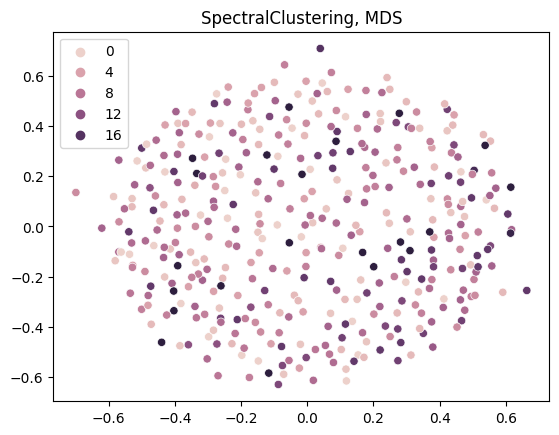

/Users/tillrostalski/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


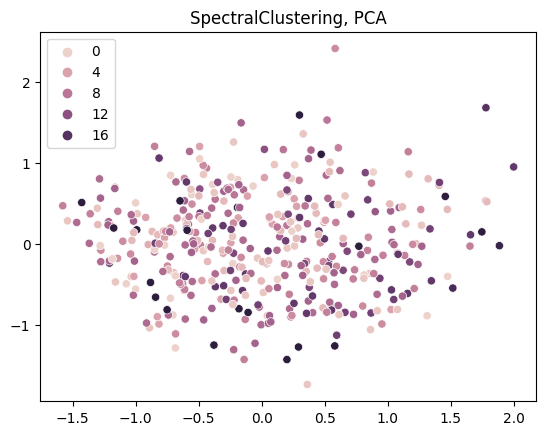

/Users/tillrostalski/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


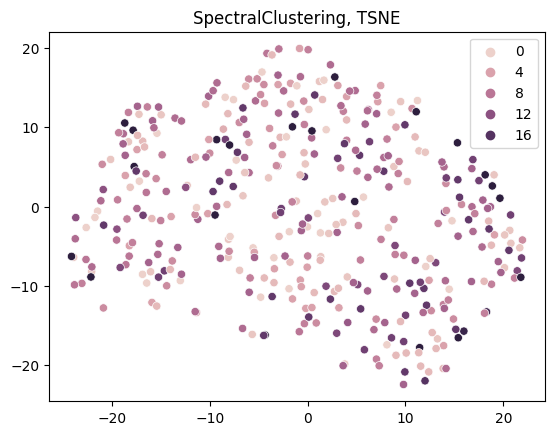

/Users/tillrostalski/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


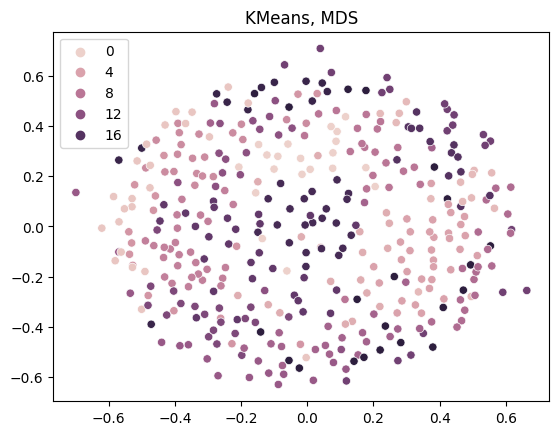

/Users/tillrostalski/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


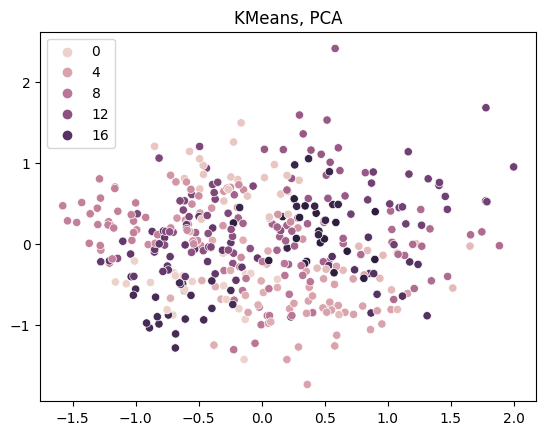

/Users/tillrostalski/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


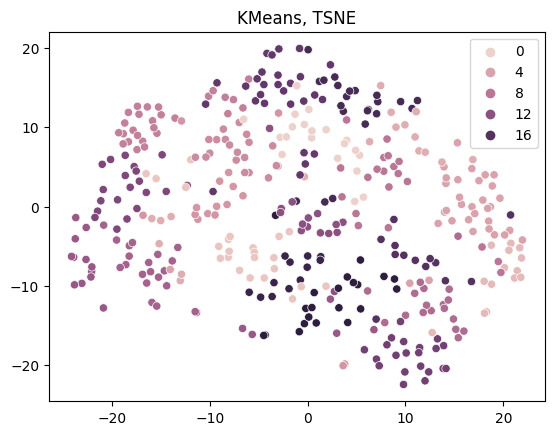

/Users/tillrostalski/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


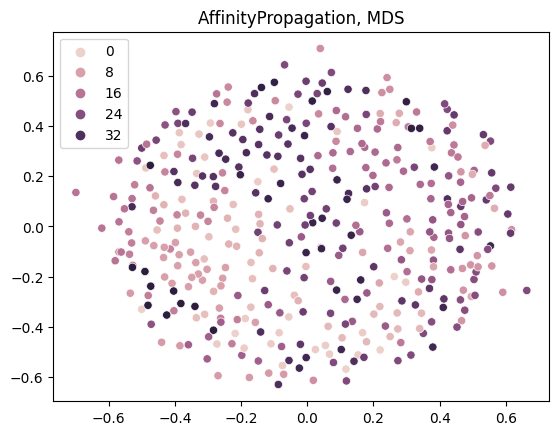

/Users/tillrostalski/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


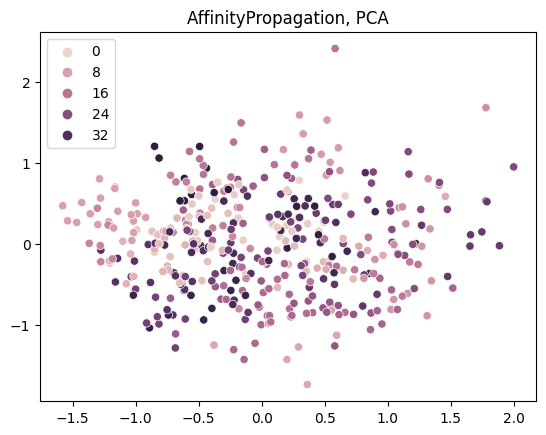

/Users/tillrostalski/Git/simpa/venv/lib/python3.9/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


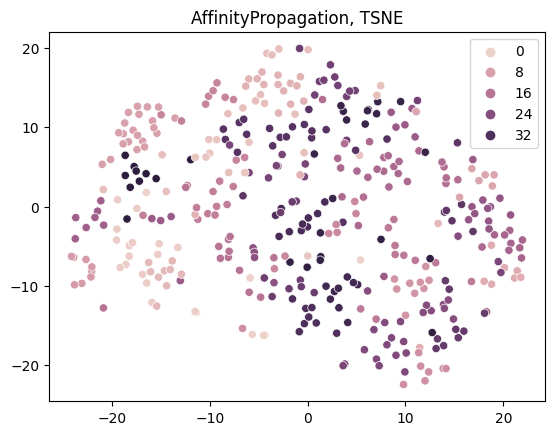

In [137]:
for cluster in clusters:
    for pos, method in zip(manifold_poss, manifold_methods):
        sns.scatterplot(x=pos[:, 0], y=pos[:, 1], hue=cluster.labels_, cmap="").set_title(
            f"{cluster.__class__.__name__}, {method.upper()}"
        )
        plt.show()

In [138]:
participants = [Proband(hadm_id=i) for i in dist_df.columns]
for p in participants:
    los_icu, los_hosp = db.get_endpoints_for_hadm_id(p.hadm_id)
    p.los_icu = los_icu
    p.los_hosp = los_hosp

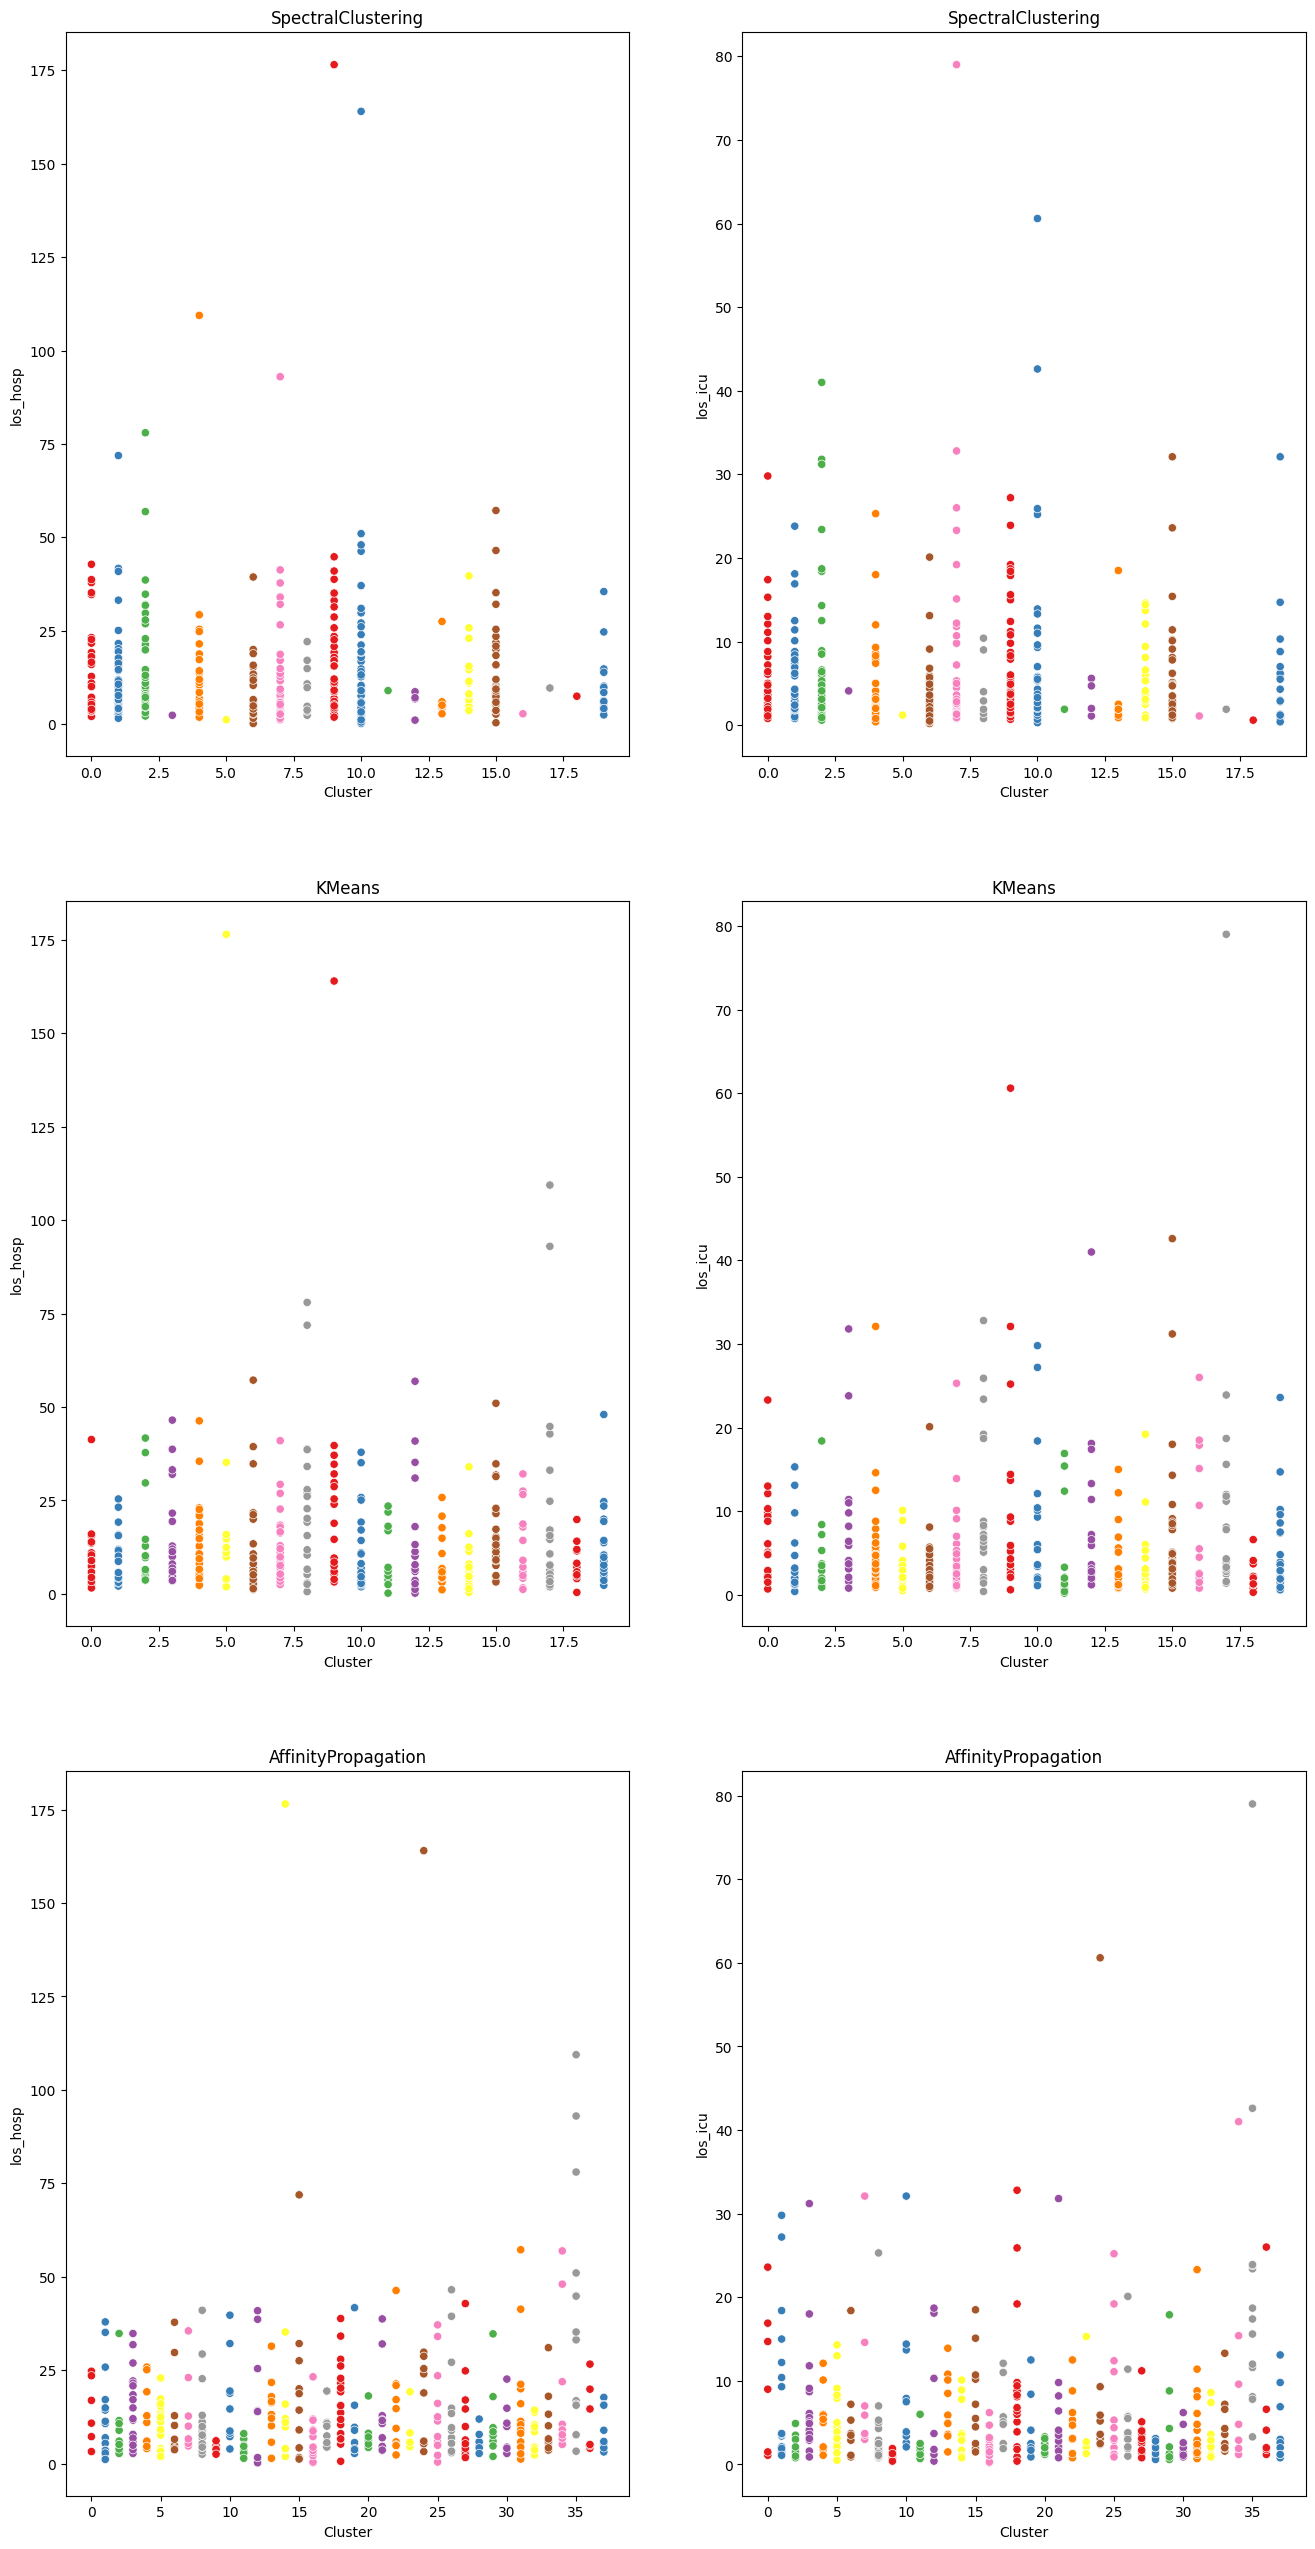

In [139]:
plot_endpoints_for_clusters(participants, clusters)

In [140]:
cluster_los_icu = {}
for cluster in clusters:
    cluster_los_icu[cluster.__class__.__name__] = {}
    for idx, label in enumerate(cluster.labels_):
        cluster_dict = cluster_los_icu[cluster.__class__.__name__]
        if not label in cluster_dict:
            cluster_dict[label] = []
        cluster_dict[label].append(participants[idx].los_icu)

In [141]:
clust_stats = {}
for k_i, v_i in cluster_los_icu.items():
    clust_stats[k_i] = {}
    for k, v in v_i.items():
        size = len(v)
        mean = np.mean(v)
        std = np.std(v)
        median = np.median(v)
        q1 = np.quantile(v, 0.25)
        q3 = np.quantile(v, 0.75)
        clust_stats[k_i][k] = {
            "mean": mean,
            "std": std,
            "median": median,
            "q1": q1,
            "q3": q3,
            "size": size,
        }
    clust_stats[k_i] = sorted(clust_stats[k_i].items(), key=lambda x: x[1]["median"])


In [142]:
clust_stats[spectral_cluster.__class__.__name__]

[(18,
  {'mean': 0.6, 'std': 0.0, 'median': 0.6, 'q1': 0.6, 'q3': 0.6, 'size': 1}),
 (16,
  {'mean': 1.1, 'std': 0.0, 'median': 1.1, 'q1': 1.1, 'q3': 1.1, 'size': 1}),
 (5,
  {'mean': 1.2, 'std': 0.0, 'median': 1.2, 'q1': 1.2, 'q3': 1.2, 'size': 1}),
 (13,
  {'mean': 3.3299999999999996,
   'std': 5.0799704723551296,
   'median': 1.9,
   'q1': 1.25,
   'q3': 2.05,
   'size': 10}),
 (17,
  {'mean': 1.9, 'std': 0.0, 'median': 1.9, 'q1': 1.9, 'q3': 1.9, 'size': 1}),
 (11,
  {'mean': 1.9, 'std': 0.0, 'median': 1.9, 'q1': 1.9, 'q3': 1.9, 'size': 1}),
 (6,
  {'mean': 3.8862068965517236,
   'std': 4.121074862964678,
   'median': 2.6,
   'q1': 1.8,
   'q3': 4.9,
   'size': 29}),
 (4,
  {'mean': 4.843333333333333,
   'std': 5.4281171280247404,
   'median': 2.7,
   'q1': 1.7000000000000002,
   'q3': 6.800000000000001,
   'size': 30}),
 (10,
  {'mean': 7.175,
   'std': 11.360640286853233,
   'median': 2.85,
   'q1': 1.675,
   'q3': 6.1,
   'size': 44}),
 (8,
  {'mean': 3.8444444444444446,
   'std'

In [143]:
def get_hadm_ids_for_cluster(cluster, cluster_label):
    return [p.hadm_id for p, label in zip(participants, cluster.labels_) if label == cluster_label]

In [144]:
h = get_hadm_ids_for_cluster(spectral_cluster, 6)
hl = db.get_mean_labevents(h)
print(hl)
hl = [l.dict() for l in hl]
hl_df = pd.DataFrame(hl)

ValueError: too many values to unpack (expected 8)

In [ ]:
hl_df.head()

id  value     id_mean  id_std_dev  itemid  subject_id   hadm_id  \
0  50801  460.0  472.386794  125.878806   50801    14464839  20038242   
1  50801  508.0  472.386794  125.878806   50801    18996386  20040940   
2  50801  423.0  472.386794  125.878806   50801    13956197  20048588   
3  50801  487.0  472.386794  125.878806   50801    10257550  20105129   
4  50801  449.0  472.386794  125.878806   50801    10683325  20194161   

  valueuom valuenum                       label  
0    mm Hg     None  Alveolar-arterial Gradient  
1    mm Hg     None  Alveolar-arterial Gradient  
2    mm Hg     None  Alveolar-arterial Gradient  
3    mm Hg     None  Alveolar-arterial Gradient  
4    mm Hg     None  Alveolar-arterial Gradient

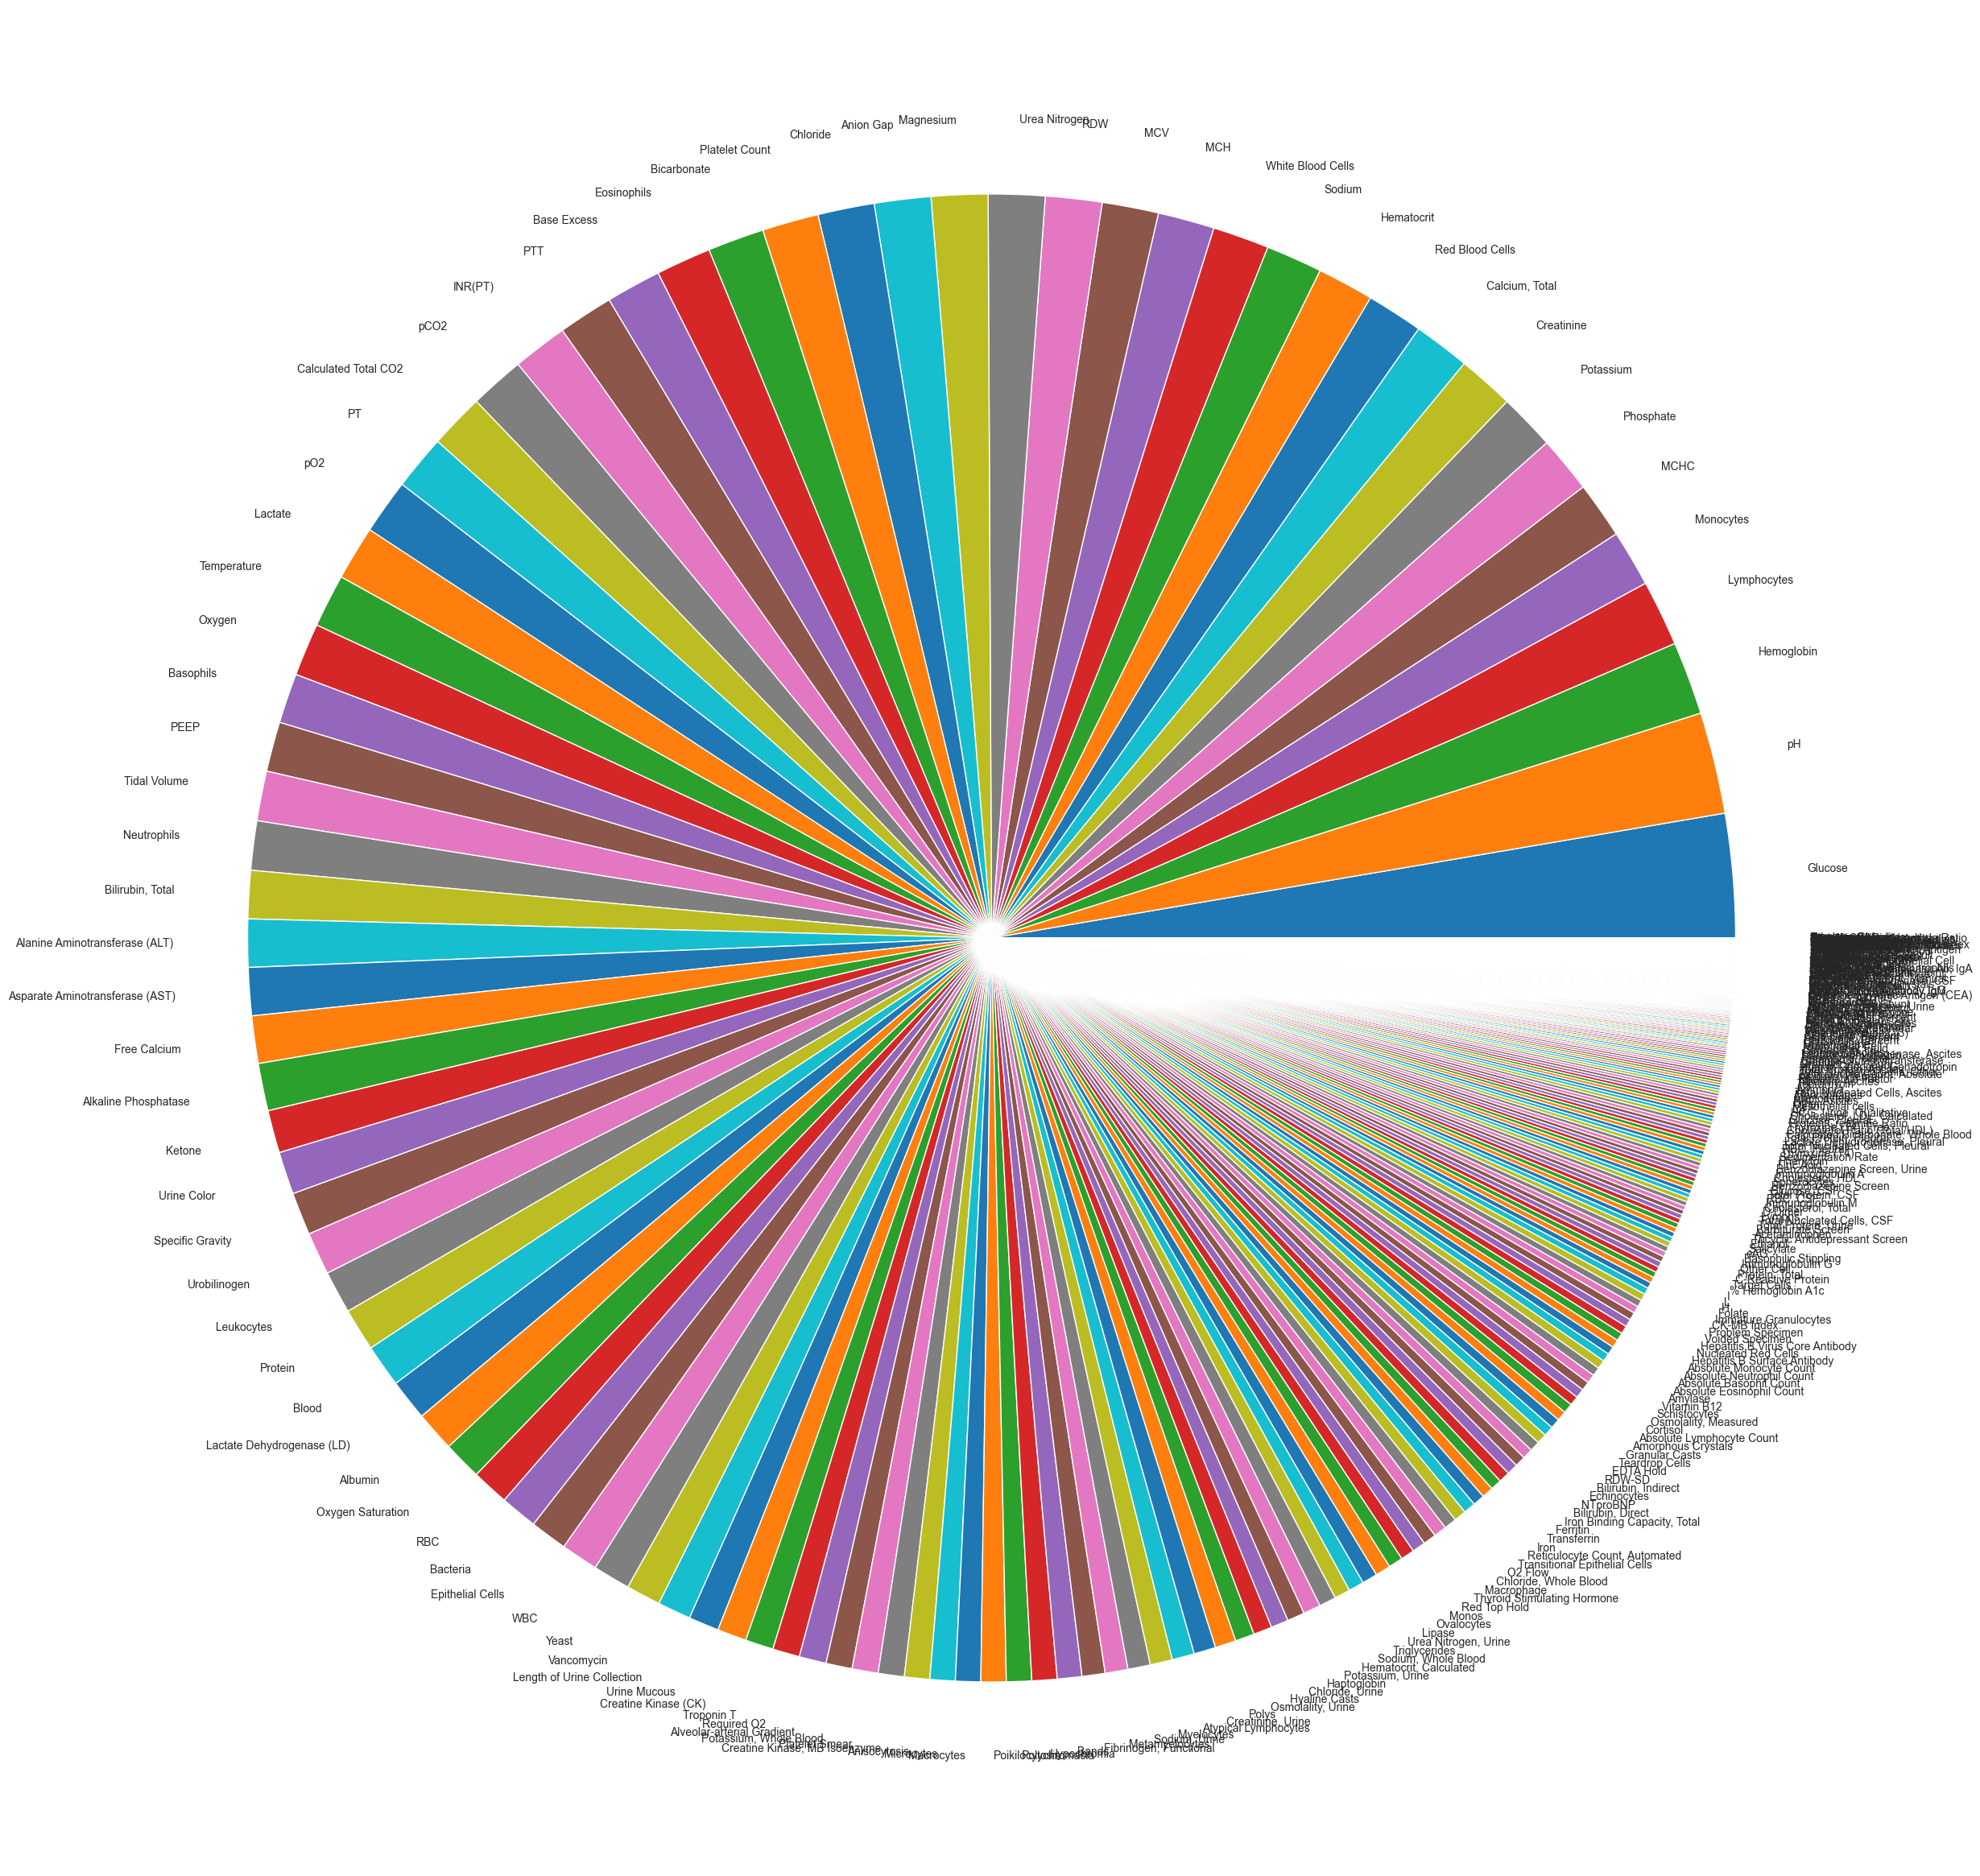

In [ ]:
# count of each id
hl_df["label"].value_counts()

# plot the counts in pie chart using seaborn, show counts in legend
sns.set_style("whitegrid")
plt.figure(figsize=(30,30))
plt.pie(hl_df["label"].value_counts(), labels=hl_df["label"].value_counts().index)
plt.show()